# Heart Disease Risk Prediction: Logistic Regression

## Step 1: Load and Prepare the Dataset

This notebook implements logistic regression from scratch to predict heart disease risk based on clinical features.

**Dataset Source:** [Kaggle Heart Disease Dataset](https://www.kaggle.com/datasets/neurocipher/heartdisease)

**Objective:** Build a logistic regression model using NumPy (no scikit-learn for core training) to understand the mathematical foundations of classification algorithms.

### 1.1 Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set display options for better visualization
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
np.random.seed(42)  # For reproducibility

print("Libraries imported successfully!")

Libraries imported successfully!


### 1.2 Load the Dataset

The dataset was downloaded from [Kaggle Heart Disease Dataset](https://www.kaggle.com/datasets/neurocipher/heartdisease) and saved as `heart_disease_prediction.csv`.

In [2]:
# Load the dataset
df = pd.read_csv('heart_disease_prediction.csv')

# Display basic info
print(f"Dataset Shape: {df.shape}")
print(f"Number of samples: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print("\nColumn Names:")
print(df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (270, 14)
Number of samples: 270
Number of features: 14

Column Names:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease']

First 5 rows:


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


### 1.3 Binarize the Target Column

Convert the target column `Heart Disease` from categorical (Presence/Absence) to binary (1/0).

In [3]:
# Check unique values in target column
print("Unique values in 'Heart Disease' column:")
print(df['Heart Disease'].unique())

# Binarize: Presence = 1, Absence = 0
df['Heart Disease'] = df['Heart Disease'].map({'Presence': 1, 'Absence': 0})

print("\nAfter binarization:")
print(df['Heart Disease'].unique())
print(f"\nValue counts:\n{df['Heart Disease'].value_counts()}")

Unique values in 'Heart Disease' column:
['Presence' 'Absence']

After binarization:
[1 0]

Value counts:
Heart Disease
0    150
1    120
Name: count, dtype: int64


### 1.4 Exploratory Data Analysis (EDA)

#### 1.4.1 Statistical Summary

In [4]:
# Statistical summary of the dataset
print("=" * 60)
print("STATISTICAL SUMMARY")
print("=" * 60)
df.describe()

STATISTICAL SUMMARY


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [5]:
# Data types and info
print("=" * 60)
print("DATA TYPES AND INFO")
print("=" * 60)
df.info()

DATA TYPES AND INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int64  
dtypes: flo

#### 1.4.2 Check for Missing Values

In [6]:
# Check for missing values
print("=" * 60)
print("MISSING VALUES")
print("=" * 60)
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal missing values: {missing_values.sum()}")

if missing_values.sum() == 0:
    print("\n✅ No missing values found in the dataset!")

MISSING VALUES
Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

Total missing values: 0

✅ No missing values found in the dataset!


#### 1.4.3 Check for Outliers using IQR Method

In [7]:
# Identify outliers using IQR method for numerical columns
numerical_cols = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression']

print("=" * 60)
print("OUTLIER DETECTION (IQR Method)")
print("=" * 60)

outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    print(f"\n{col}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f"  Number of outliers: {len(outliers)}")

print("\n" + "=" * 60)
print("OUTLIER SUMMARY")
print("=" * 60)
for col, count in outlier_summary.items():
    print(f"{col}: {count} outliers")

# Note: We will keep the outliers as they represent real clinical values
print("\n📝 Note: Outliers are kept as they represent real clinical measurements.")

OUTLIER DETECTION (IQR Method)

Age:
  Q1: 48.00, Q3: 61.00, IQR: 13.00
  Lower bound: 28.50, Upper bound: 80.50
  Number of outliers: 0

BP:
  Q1: 120.00, Q3: 140.00, IQR: 20.00
  Lower bound: 90.00, Upper bound: 170.00
  Number of outliers: 9

Cholesterol:
  Q1: 213.00, Q3: 280.00, IQR: 67.00
  Lower bound: 112.50, Upper bound: 380.50
  Number of outliers: 5

Max HR:
  Q1: 133.00, Q3: 166.00, IQR: 33.00
  Lower bound: 83.50, Upper bound: 215.50
  Number of outliers: 1

ST depression:
  Q1: 0.00, Q3: 1.60, IQR: 1.60
  Lower bound: -2.40, Upper bound: 4.00
  Number of outliers: 4

OUTLIER SUMMARY
Age: 0 outliers
BP: 9 outliers
Cholesterol: 5 outliers
Max HR: 1 outliers
ST depression: 4 outliers

📝 Note: Outliers are kept as they represent real clinical measurements.


#### 1.4.4 Class Distribution Visualization

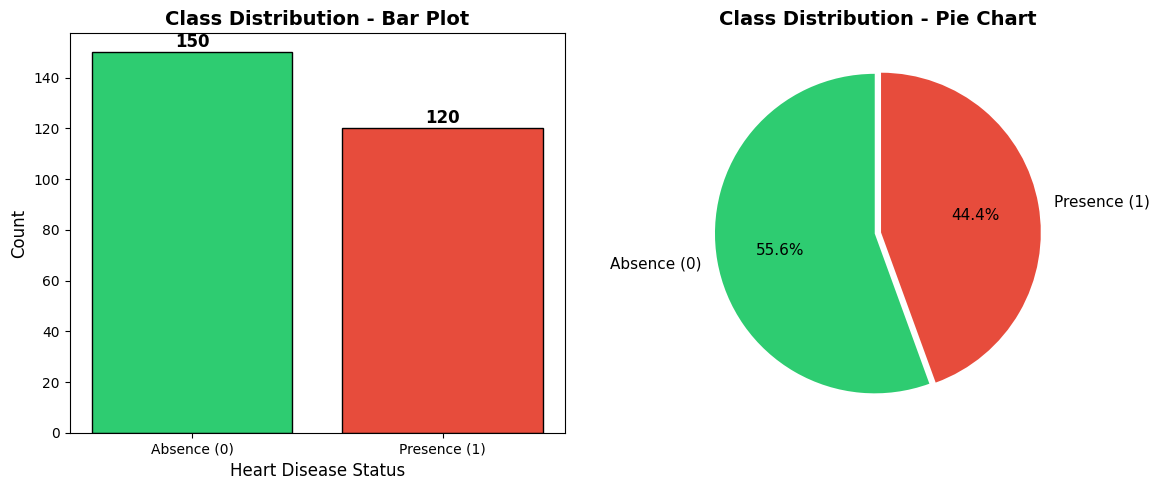


📊 Disease Rate: 44.44% (120 out of 270 patients)


In [8]:
# Plot class distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
class_counts = df['Heart Disease'].value_counts()
colors = ['#2ecc71', '#e74c3c']  # Green for Absence, Red for Presence
labels = ['Absence (0)', 'Presence (1)']

axes[0].bar(labels, [class_counts[0], class_counts[1]], color=colors, edgecolor='black')
axes[0].set_xlabel('Heart Disease Status', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Class Distribution - Bar Plot', fontsize=14, fontweight='bold')
for i, v in enumerate([class_counts[0], class_counts[1]]):
    axes[0].text(i, v + 2, str(v), ha='center', fontsize=12, fontweight='bold')

# Pie chart
axes[1].pie([class_counts[0], class_counts[1]], labels=labels, colors=colors, 
            autopct='%1.1f%%', startangle=90, explode=(0.02, 0.02),
            textprops={'fontsize': 11})
axes[1].set_title('Class Distribution - Pie Chart', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print disease rate
disease_rate = (df['Heart Disease'].sum() / len(df)) * 100
print(f"\n📊 Disease Rate: {disease_rate:.2f}% ({df['Heart Disease'].sum()} out of {len(df)} patients)")

#### 1.4.5 Feature Distributions by Class

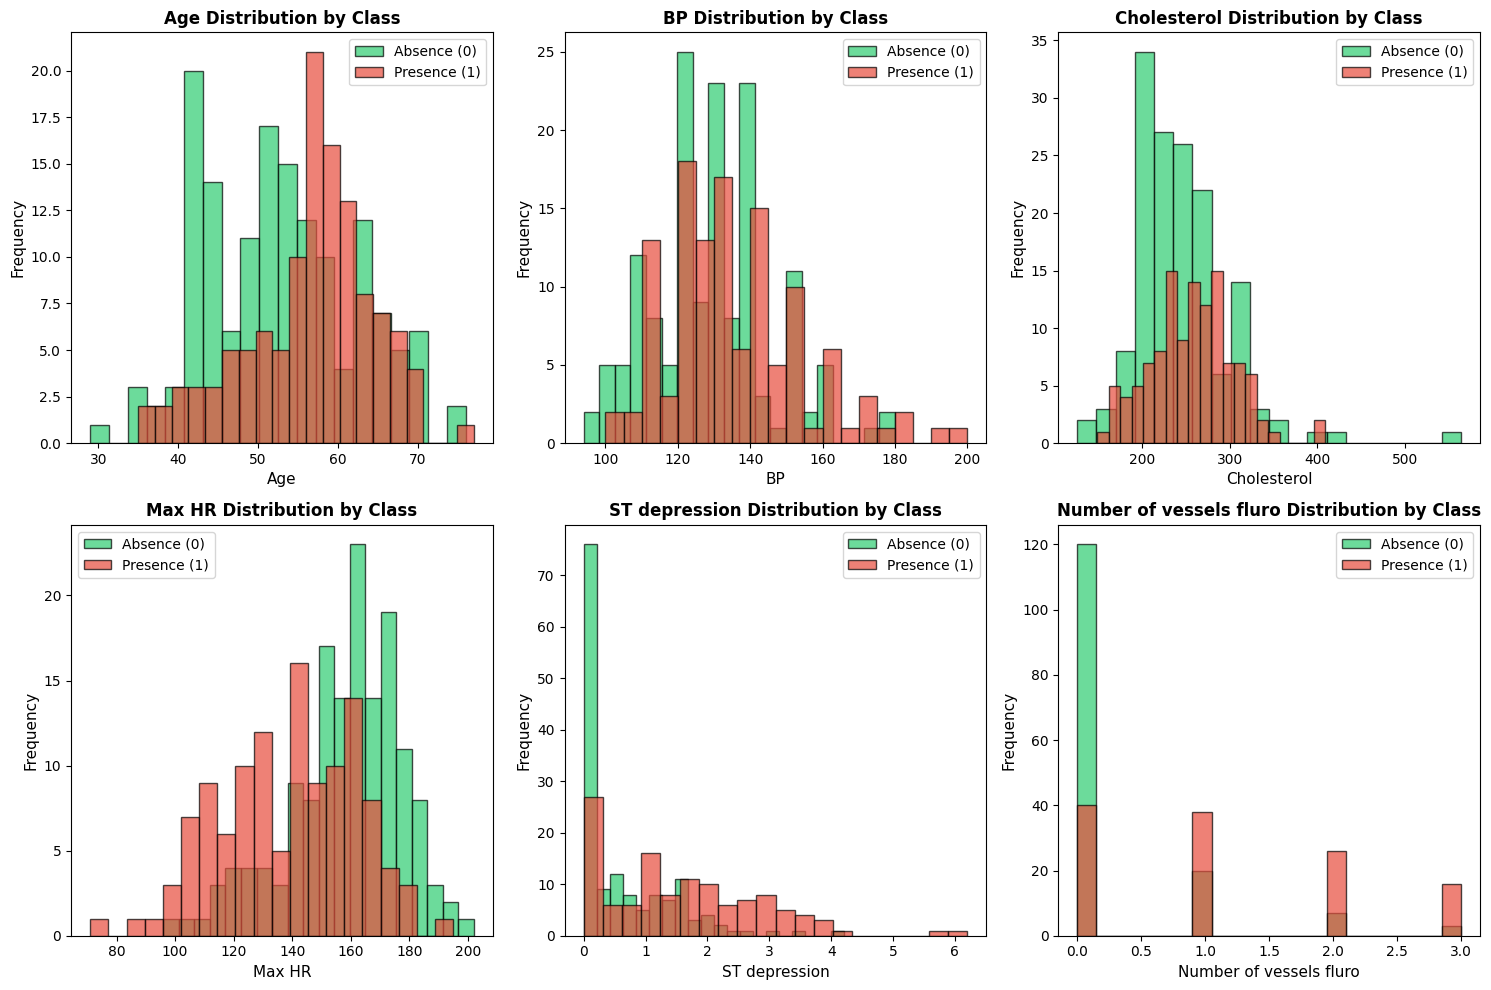

In [9]:
# Histograms of key numerical features by class
features_to_plot = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, feature in enumerate(features_to_plot):
    # Separate data by class
    absence = df[df['Heart Disease'] == 0][feature]
    presence = df[df['Heart Disease'] == 1][feature]
    
    axes[idx].hist(absence, bins=20, alpha=0.7, label='Absence (0)', color='#2ecc71', edgecolor='black')
    axes[idx].hist(presence, bins=20, alpha=0.7, label='Presence (1)', color='#e74c3c', edgecolor='black')
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Frequency', fontsize=11)
    axes[idx].set_title(f'{feature} Distribution by Class', fontsize=12, fontweight='bold')
    axes[idx].legend()

plt.tight_layout()
plt.show()

#### 1.4.6 Correlation Matrix

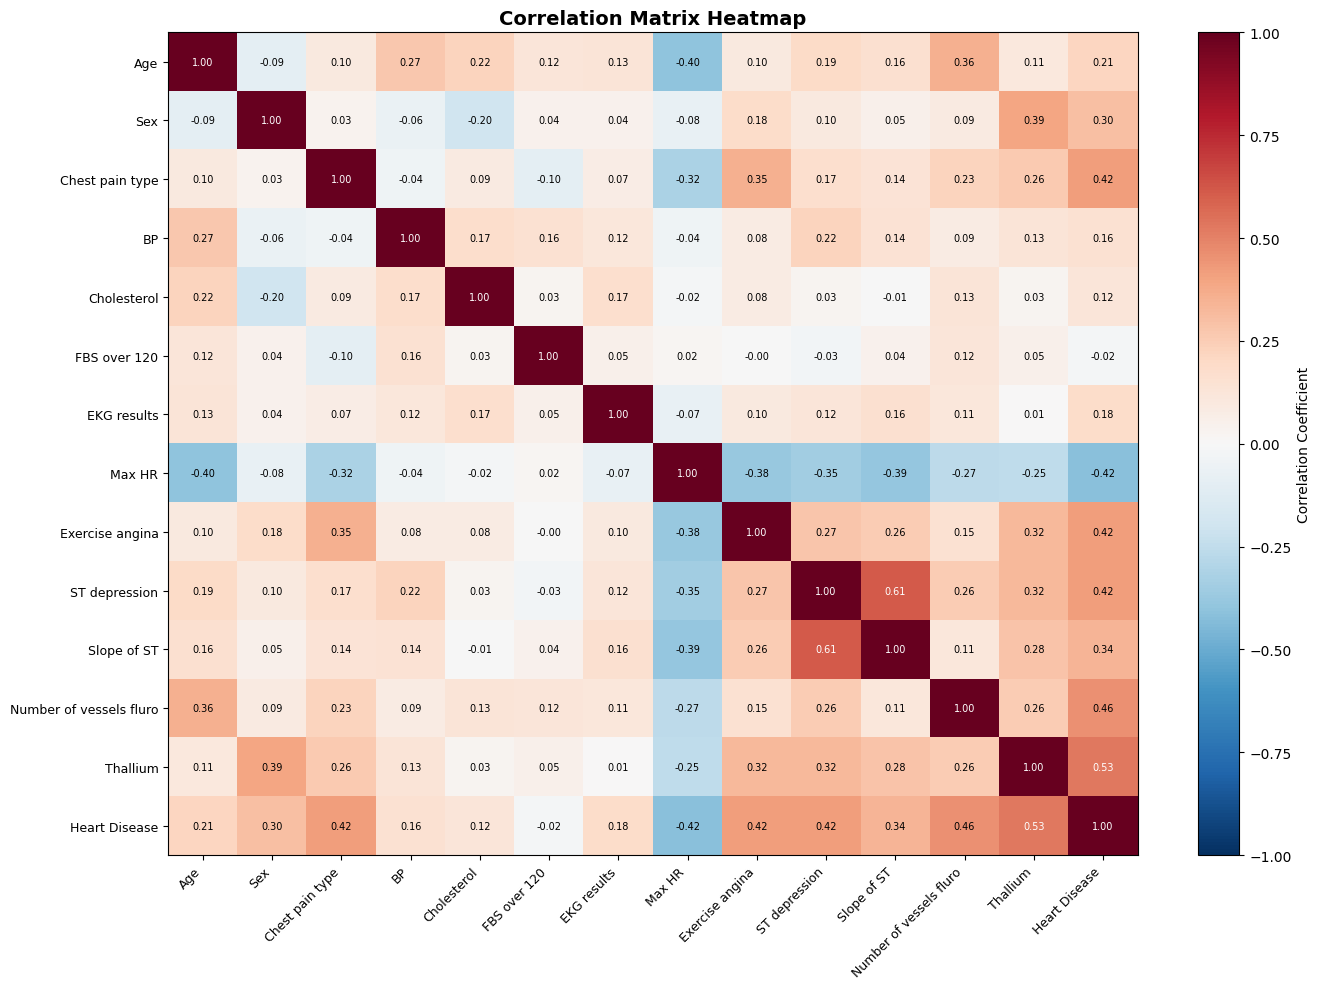


📊 Correlation with Heart Disease (Target):
  Thallium                      : +0.525
  Number of vessels fluro       : +0.455
  Exercise angina               : +0.419
  ST depression                 : +0.418
  Chest pain type               : +0.417
  Slope of ST                   : +0.338
  Sex                           : +0.298
  Age                           : +0.212
  EKG results                   : +0.182
  BP                            : +0.155
  Cholesterol                   : +0.118
  FBS over 120                  : -0.016
  Max HR                        : -0.419


In [10]:
# Correlation matrix heatmap
correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
# Create heatmap manually using imshow
im = plt.imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation Coefficient')

# Add labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right', fontsize=9)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=9)

# Add correlation values as text
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text_color = 'white' if abs(correlation_matrix.iloc[i, j]) > 0.5 else 'black'
        plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color=text_color, fontsize=7)

plt.title('Correlation Matrix Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Show correlation with target
print("\n📊 Correlation with Heart Disease (Target):")
print("=" * 50)
target_corr = correlation_matrix['Heart Disease'].drop('Heart Disease').sort_values(ascending=False)
for feature, corr in target_corr.items():
    sign = "+" if corr > 0 else ""
    print(f"  {feature:30s}: {sign}{corr:.3f}")

### 1.5 Feature Selection

Select ≥6 features for the model based on clinical relevance and correlation with the target variable.

In [11]:
# Select features for the model
# Choosing 8 features based on clinical relevance and correlation with target
selected_features = [
    'Age',                      # Demographics
    'Sex',                      # Demographics  
    'Chest pain type',          # Symptoms
    'BP',                       # Blood Pressure
    'Cholesterol',              # Blood lipids
    'Max HR',                   # Cardiac performance
    'ST depression',            # ECG indicator
    'Number of vessels fluro'   # Angiography result
]

print("=" * 60)
print("SELECTED FEATURES FOR MODEL")
print("=" * 60)
for i, feature in enumerate(selected_features, 1):
    corr_value = correlation_matrix.loc[feature, 'Heart Disease']
    print(f"  {i}. {feature:25s} (correlation with target: {corr_value:+.3f})")

print(f"\n✅ Total features selected: {len(selected_features)}")

SELECTED FEATURES FOR MODEL
  1. Age                       (correlation with target: +0.212)
  2. Sex                       (correlation with target: +0.298)
  3. Chest pain type           (correlation with target: +0.417)
  4. BP                        (correlation with target: +0.155)
  5. Cholesterol               (correlation with target: +0.118)
  6. Max HR                    (correlation with target: -0.419)
  7. ST depression             (correlation with target: +0.418)
  8. Number of vessels fluro   (correlation with target: +0.455)

✅ Total features selected: 8


### 1.6 Train/Test Split (70/30 - Stratified)

Implement a stratified split to maintain the class distribution in both training and testing sets.

In [12]:
def stratified_train_test_split(X, y, test_size=0.3, random_state=42):
    """
    Perform stratified train/test split manually without sklearn.
    
    Parameters:
    -----------
    X : numpy array - Features
    y : numpy array - Target variable
    test_size : float - Proportion of data for testing (default: 0.3)
    random_state : int - Random seed for reproducibility
    
    Returns:
    --------
    X_train, X_test, y_train, y_test
    """
    np.random.seed(random_state)
    
    # Get indices for each class
    class_0_indices = np.where(y == 0)[0]
    class_1_indices = np.where(y == 1)[0]
    
    # Shuffle indices within each class
    np.random.shuffle(class_0_indices)
    np.random.shuffle(class_1_indices)
    
    # Calculate split points for each class
    n_test_class_0 = int(len(class_0_indices) * test_size)
    n_test_class_1 = int(len(class_1_indices) * test_size)
    
    # Split indices
    test_indices_0 = class_0_indices[:n_test_class_0]
    train_indices_0 = class_0_indices[n_test_class_0:]
    
    test_indices_1 = class_1_indices[:n_test_class_1]
    train_indices_1 = class_1_indices[n_test_class_1:]
    
    # Combine indices
    train_indices = np.concatenate([train_indices_0, train_indices_1])
    test_indices = np.concatenate([test_indices_0, test_indices_1])
    
    # Shuffle combined indices
    np.random.shuffle(train_indices)
    np.random.shuffle(test_indices)
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

# Prepare feature matrix and target vector
X = df[selected_features].values
y = df['Heart Disease'].values

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Feature matrix shape: (270, 8)
Target vector shape: (270,)


In [13]:
# Perform stratified split
X_train, X_test, y_train, y_test = stratified_train_test_split(X, y, test_size=0.3, random_state=42)

print("=" * 60)
print("TRAIN/TEST SPLIT RESULTS (70/30 - Stratified)")
print("=" * 60)
print(f"\nTraining set:")
print(f"  X_train shape: {X_train.shape}")
print(f"  y_train shape: {y_train.shape}")
print(f"  Class 0 (Absence): {np.sum(y_train == 0)} ({np.sum(y_train == 0)/len(y_train)*100:.1f}%)")
print(f"  Class 1 (Presence): {np.sum(y_train == 1)} ({np.sum(y_train == 1)/len(y_train)*100:.1f}%)")

print(f"\nTest set:")
print(f"  X_test shape: {X_test.shape}")
print(f"  y_test shape: {y_test.shape}")
print(f"  Class 0 (Absence): {np.sum(y_test == 0)} ({np.sum(y_test == 0)/len(y_test)*100:.1f}%)")
print(f"  Class 1 (Presence): {np.sum(y_test == 1)} ({np.sum(y_test == 1)/len(y_test)*100:.1f}%)")

print("\n✅ Stratification verified: Class proportions maintained in both sets!")

TRAIN/TEST SPLIT RESULTS (70/30 - Stratified)

Training set:
  X_train shape: (189, 8)
  y_train shape: (189,)
  Class 0 (Absence): 105 (55.6%)
  Class 1 (Presence): 84 (44.4%)

Test set:
  X_test shape: (81, 8)
  y_test shape: (81,)
  Class 0 (Absence): 45 (55.6%)
  Class 1 (Presence): 36 (44.4%)

✅ Stratification verified: Class proportions maintained in both sets!


### 1.7 Feature Normalization (Z-Score Standardization)

Normalize numerical features to have zero mean and unit variance. This is important for gradient descent convergence.

In [14]:
def normalize_features(X_train, X_test):
    """
    Normalize features using Z-score standardization.
    
    Parameters:
    -----------
    X_train : numpy array - Training features
    X_test : numpy array - Test features
    
    Returns:
    --------
    X_train_norm, X_test_norm, mean, std
    
    Note: We fit on training data only to avoid data leakage.
    """
    # Calculate mean and std from training data only
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    
    # Avoid division by zero
    std = np.where(std == 0, 1, std)
    
    # Normalize both sets using training statistics
    X_train_norm = (X_train - mean) / std
    X_test_norm = (X_test - mean) / std
    
    return X_train_norm, X_test_norm, mean, std

# Normalize features
X_train_norm, X_test_norm, feature_mean, feature_std = normalize_features(X_train, X_test)

print("=" * 60)
print("FEATURE NORMALIZATION (Z-Score Standardization)")
print("=" * 60)
print("\nTraining set statistics BEFORE normalization:")
print(f"  Mean: {np.mean(X_train, axis=0).round(2)}")
print(f"  Std:  {np.std(X_train, axis=0).round(2)}")

print("\nTraining set statistics AFTER normalization:")
print(f"  Mean: {np.mean(X_train_norm, axis=0).round(4)}")
print(f"  Std:  {np.std(X_train_norm, axis=0).round(4)}")

print("\n✅ Features normalized successfully!")

FEATURE NORMALIZATION (Z-Score Standardization)

Training set statistics BEFORE normalization:
  Mean: [ 54.58   0.69   3.22 131.65 256.22 149.13   1.04   0.68]
  Std:  [ 9.29  0.46  0.89 18.42 52.76 23.37  1.13  0.97]

Training set statistics AFTER normalization:
  Mean: [-0.  0. -0.  0. -0. -0.  0. -0.]
  Std:  [1. 1. 1. 1. 1. 1. 1. 1.]

✅ Features normalized successfully!


In [15]:
# Display normalization parameters for each feature
print("=" * 60)
print("NORMALIZATION PARAMETERS BY FEATURE")
print("=" * 60)
print(f"\n{'Feature':<30} {'Mean':>12} {'Std':>12}")
print("-" * 54)
for i, feature in enumerate(selected_features):
    print(f"{feature:<30} {feature_mean[i]:>12.3f} {feature_std[i]:>12.3f}")

NORMALIZATION PARAMETERS BY FEATURE

Feature                                Mean          Std
------------------------------------------------------
Age                                  54.582        9.295
Sex                                   0.688        0.463
Chest pain type                       3.222        0.887
BP                                  131.646       18.419
Cholesterol                         256.217       52.761
Max HR                              149.132       23.371
ST depression                         1.038        1.126
Number of vessels fluro               0.677        0.969


### 1.8 Data Preparation Summary

Final summary of the prepared data ready for logistic regression training.

In [16]:
# Final summary
print("=" * 70)
print("📋 STEP 1 COMPLETE: DATA PREPARATION SUMMARY")
print("=" * 70)

print("\n📁 DATASET INFORMATION:")
print(f"   • Source: Kaggle Heart Disease Dataset")
print(f"   • Total samples: {len(df)}")
print(f"   • Total features: {df.shape[1] - 1}")
print(f"   • Disease rate: {(df['Heart Disease'].sum() / len(df)) * 100:.2f}%")

print("\n🔍 EDA FINDINGS:")
print(f"   • Missing values: 0")
print(f"   • Outliers detected but kept (real clinical values)")
print(f"   • Class distribution: {np.sum(y == 0)} Absence / {np.sum(y == 1)} Presence")

print("\n✂️ DATA SPLIT (70/30 - Stratified):")
print(f"   • Training samples: {len(X_train_norm)} ({len(X_train_norm)/len(X)*100:.1f}%)")
print(f"   • Test samples: {len(X_test_norm)} ({len(X_test_norm)/len(X)*100:.1f}%)")

print("\n📊 SELECTED FEATURES ({} total):".format(len(selected_features)))
for i, feature in enumerate(selected_features, 1):
    print(f"   {i}. {feature}")

print("\n⚙️ PREPROCESSING:")
print(f"   • Target binarized: Presence=1, Absence=0")
print(f"   • Features normalized: Z-score standardization")
print(f"   • Normalization fitted on training data only (no data leakage)")

print("\n" + "=" * 70)
print("✅ Data is ready for logistic regression training!")
print("=" * 70)

📋 STEP 1 COMPLETE: DATA PREPARATION SUMMARY

📁 DATASET INFORMATION:
   • Source: Kaggle Heart Disease Dataset
   • Total samples: 270
   • Total features: 13
   • Disease rate: 44.44%

🔍 EDA FINDINGS:
   • Missing values: 0
   • Outliers detected but kept (real clinical values)
   • Class distribution: 150 Absence / 120 Presence

✂️ DATA SPLIT (70/30 - Stratified):
   • Training samples: 189 (70.0%)
   • Test samples: 81 (30.0%)

📊 SELECTED FEATURES (8 total):
   1. Age
   2. Sex
   3. Chest pain type
   4. BP
   5. Cholesterol
   6. Max HR
   7. ST depression
   8. Number of vessels fluro

⚙️ PREPROCESSING:
   • Target binarized: Presence=1, Absence=0
   • Features normalized: Z-score standardization
   • Normalization fitted on training data only (no data leakage)

✅ Data is ready for logistic regression training!


---

## Step 2: Implement Basic Logistic Regression

In this step we will:
1. Implement the **sigmoid function** $\sigma(z) = \frac{1}{1 + e^{-z}}$
2. Implement the **cost function** (binary cross-entropy)
3. Implement **gradient descent** with gradient tracking
4. Train the model on the full training set
5. Evaluate performance metrics (accuracy, precision, recall, F1-score)

### 2.1 Sigmoid Function

The sigmoid function maps any real number to the interval $(0, 1)$:

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

Properties:
- $\sigma(z) \to 0$ as $z \to -\infty$
- $\sigma(z) \to 1$ as $z \to +\infty$
- $\sigma(0) = 0.5$

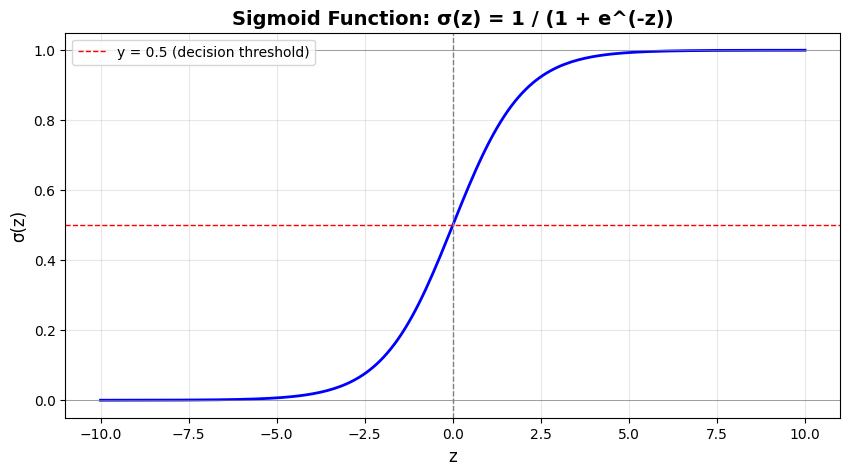

Sigmoid function tests:
  σ(-10) = 0.000045 ≈ 0
  σ(0)   = 0.500000 = 0.5
  σ(10)  = 0.999955 ≈ 1


In [17]:
def sigmoid(z):
    """
    Compute the sigmoid of z.
    
    Parameters:
    -----------
    z : numpy array or scalar - Input value(s)
    
    Returns:
    --------
    sigmoid(z) = 1 / (1 + exp(-z))
    """
    return 1 / (1 + np.exp(-z))

# Visualize the sigmoid function
z_values = np.linspace(-10, 10, 200)
sig_values = sigmoid(z_values)

plt.figure(figsize=(10, 5))
plt.plot(z_values, sig_values, 'b-', linewidth=2)
plt.title("Sigmoid Function: σ(z) = 1 / (1 + e^(-z))", fontsize=14, fontweight='bold')
plt.xlabel("z", fontsize=12)
plt.ylabel("σ(z)", fontsize=12)
plt.ylim(-0.05, 1.05)
plt.axhline(0.5, color="red", linestyle="--", linewidth=1, label="y = 0.5 (decision threshold)")
plt.axvline(0, color="gray", linestyle="--", linewidth=1)
plt.axhline(0, color="gray", linestyle="-", linewidth=0.5)
plt.axhline(1, color="gray", linestyle="-", linewidth=0.5)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Test sigmoid function
print("Sigmoid function tests:")
print(f"  σ(-10) = {sigmoid(-10):.6f} ≈ 0")
print(f"  σ(0)   = {sigmoid(0):.6f} = 0.5")
print(f"  σ(10)  = {sigmoid(10):.6f} ≈ 1")

### 2.2 Cost Function (Binary Cross-Entropy)

The logistic regression cost function is defined as:

$$J(\vec{w}, b) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(f_{\vec{w},b}(\vec{x}^{(i)})) + (1 - y^{(i)}) \log(1 - f_{\vec{w},b}(\vec{x}^{(i)})) \right]$$

Where:
- $m$ = number of training examples
- $f_{\vec{w},b}(\vec{x}^{(i)}) = \sigma(\vec{w} \cdot \vec{x}^{(i)} + b)$ = model prediction
- $y^{(i)}$ = true label (0 or 1)

In [18]:
def compute_cost(w, b, X, y):
    """
    Compute the logistic regression cost function (binary cross-entropy).
    
    Parameters:
    -----------
    w : numpy array (n,) - Weight vector
    b : float - Bias term
    X : numpy array (m, n) - Feature matrix
    y : numpy array (m,) - Target vector
    
    Returns:
    --------
    J : float - Cost value
    """
    m = X.shape[0]
    
    # Compute predictions: f_{w,b}(x^{(i)}) = sigmoid(w·x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)
    
    # Clip predictions to avoid log(0)
    eps = 1e-8
    f_clipped = np.clip(f, eps, 1 - eps)
    
    # Compute cost: J(w,b) = -1/m * Σ[y*log(f) + (1-y)*log(1-f)]
    J = -(1 / m) * np.sum(
        y * np.log(f_clipped) + (1 - y) * np.log(1 - f_clipped)
    )
    
    return J

# Test with initial parameters (zeros)
w_init = np.zeros(X_train_norm.shape[1])
b_init = 0.0
initial_cost = compute_cost(w_init, b_init, X_train_norm, y_train)
print(f"Initial cost with w=0, b=0: {initial_cost:.6f}")
print(f"Expected initial cost ≈ -log(0.5) = {-np.log(0.5):.6f}")

Initial cost with w=0, b=0: 0.693147
Expected initial cost ≈ -log(0.5) = 0.693147


### 2.3 Gradient Computation

The gradients of the cost function are:

$$\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} \left( f_{\vec{w},b}(\vec{x}^{(i)}) - y^{(i)} \right)$$

In vectorized form:
- $\nabla_{\vec{w}} J = \frac{1}{m} X^T \vec{e}$ where $\vec{e} = \vec{f} - \vec{y}$
- $\frac{\partial J}{\partial b} = \frac{1}{m} \sum e^{(i)}$

In [19]:
def compute_gradient(w, b, X, y):
    """
    Compute gradients of the cost function with respect to w and b.
    
    Parameters:
    -----------
    w : numpy array (n,) - Weight vector
    b : float - Bias term
    X : numpy array (m, n) - Feature matrix
    y : numpy array (m,) - Target vector
    
    Returns:
    --------
    dj_dw : numpy array (n,) - Gradient with respect to w
    dj_db : float - Gradient with respect to b
    """
    m = X.shape[0]
    
    # Compute predictions: f_{w,b}(x^{(i)}) = sigmoid(w·x^{(i)} + b)
    z = X @ w + b
    f = sigmoid(z)
    
    # Compute error: e^{(i)} = f_{w,b}(x^{(i)}) - y^{(i)}
    error = f - y
    
    # Compute gradients (vectorized)
    dj_dw = (1 / m) * (X.T @ error)
    dj_db = (1 / m) * np.sum(error)
    
    return dj_dw, dj_db

# Test gradient computation
dj_dw_test, dj_db_test = compute_gradient(w_init, b_init, X_train_norm, y_train)
print("Initial gradients:")
print(f"  dJ/dw shape: {dj_dw_test.shape}")
print(f"  dJ/dw: {dj_dw_test.round(4)}")
print(f"  dJ/db: {dj_db_test:.4f}")

Initial gradients:
  dJ/dw shape: (8,)
  dJ/dw: [-0.1355 -0.1281 -0.1869 -0.141  -0.0828  0.216  -0.218  -0.2191]
  dJ/db: 0.0556


### 2.4 Gradient Descent Algorithm

Gradient descent updates the parameters iteratively:

$$w_j := w_j - \alpha \frac{\partial J}{\partial w_j}$$
$$b := b - \alpha \frac{\partial J}{\partial b}$$

Where $\alpha$ is the learning rate.

In [20]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    """
    Run gradient descent to optimize w and b.
    
    Parameters:
    -----------
    X : numpy array (m, n) - Feature matrix
    y : numpy array (m,) - Target vector
    w_init : numpy array (n,) - Initial weights
    b_init : float - Initial bias
    alpha : float - Learning rate
    num_iters : int - Number of iterations
    print_every : int - Print progress every n iterations (0 to disable)
    
    Returns:
    --------
    w : numpy array (n,) - Optimized weights
    b : float - Optimized bias
    J_history : list - Cost values at each iteration
    """
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        # Compute gradients
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Track cost
        J = compute_cost(w, b, X, y)
        J_history.append(J)
        
        # Print progress
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iteration {i:5d}: Cost J = {J:.6f}")
    
    return w, b, J_history

print("✅ Gradient descent function defined successfully!")

✅ Gradient descent function defined successfully!


### 2.5 Train the Model

Train the logistic regression model on the full training set with:
- Learning rate: α = 0.01
- Iterations: 1000+

In [21]:
# Training hyperparameters
alpha = 0.01        # Learning rate
num_iters = 2000    # Number of iterations

# Initialize parameters
n_features = X_train_norm.shape[1]
w_init = np.zeros(n_features)
b_init = 0.0

print("=" * 70)
print("TRAINING LOGISTIC REGRESSION MODEL")
print("=" * 70)
print(f"\nHyperparameters:")
print(f"  • Learning rate (α): {alpha}")
print(f"  • Iterations: {num_iters}")
print(f"  • Number of features: {n_features}")
print(f"  • Training samples: {X_train_norm.shape[0]}")
print("\nTraining progress:")
print("-" * 50)

# Train the model
w_trained, b_trained, J_history = gradient_descent(
    X_train_norm, y_train, 
    w_init, b_init, 
    alpha, num_iters, 
    print_every=200
)

print("-" * 50)
print(f"\n✅ Training complete!")
print(f"Final cost: {J_history[-1]:.6f}")

TRAINING LOGISTIC REGRESSION MODEL

Hyperparameters:
  • Learning rate (α): 0.01
  • Iterations: 2000
  • Number of features: 8
  • Training samples: 189

Training progress:
--------------------------------------------------
Iteration     0: Cost J = 0.690736
Iteration   200: Cost J = 0.476854
Iteration   400: Cost J = 0.424266
Iteration   600: Cost J = 0.401976
Iteration   800: Cost J = 0.389955
Iteration  1000: Cost J = 0.382584
Iteration  1200: Cost J = 0.377696
Iteration  1400: Cost J = 0.374277
Iteration  1600: Cost J = 0.371795
Iteration  1800: Cost J = 0.369941
Iteration  1999: Cost J = 0.368533
--------------------------------------------------

✅ Training complete!
Final cost: 0.368533


### 2.6 Plot Cost vs. Iterations

Visualize the convergence of gradient descent by plotting the cost function over iterations.

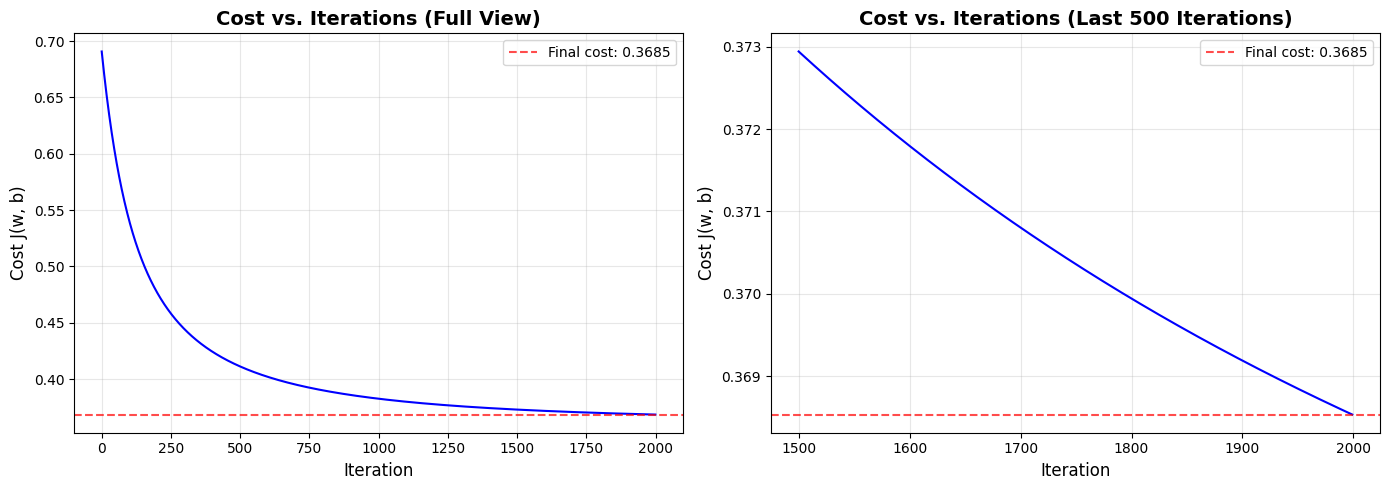


📈 CONVERGENCE ANALYSIS:
Initial cost: 0.690736
Final cost:   0.368533
Cost reduction: 0.322203 (46.65%)

Last 10 iterations cost change: 0.00005621


In [22]:
# Plot cost vs iterations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Full cost history
axes[0].plot(J_history, 'b-', linewidth=1.5)
axes[0].set_title('Cost vs. Iterations (Full View)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Iteration', fontsize=12)
axes[0].set_ylabel('Cost J(w, b)', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=J_history[-1], color='r', linestyle='--', alpha=0.7, label=f'Final cost: {J_history[-1]:.4f}')
axes[0].legend()

# Zoomed view (last 500 iterations)
start_idx = max(0, len(J_history) - 500)
axes[1].plot(range(start_idx, len(J_history)), J_history[start_idx:], 'b-', linewidth=1.5)
axes[1].set_title('Cost vs. Iterations (Last 500 Iterations)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Iteration', fontsize=12)
axes[1].set_ylabel('Cost J(w, b)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=J_history[-1], color='r', linestyle='--', alpha=0.7, label=f'Final cost: {J_history[-1]:.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Analyze convergence
print("\n📈 CONVERGENCE ANALYSIS:")
print("=" * 50)
print(f"Initial cost: {J_history[0]:.6f}")
print(f"Final cost:   {J_history[-1]:.6f}")
print(f"Cost reduction: {J_history[0] - J_history[-1]:.6f} ({((J_history[0] - J_history[-1])/J_history[0])*100:.2f}%)")
print(f"\nLast 10 iterations cost change: {J_history[-10] - J_history[-1]:.8f}")

if J_history[-10] - J_history[-1] < 1e-5:
    print("✅ Model has converged (cost change < 1e-5)")

### 2.7 Trained Model Parameters

Display the learned weights and their interpretation.

TRAINED MODEL PARAMETERS

Bias (b): -0.244332

Weights (w):
------------------------------------------------------------
Feature                              Weight Interpretation      
------------------------------------------------------------
Age                                0.028638 ~ Minimal impact    
Sex                                0.752271 ↑ Increases risk    
Chest pain type                    0.630873 ↑ Increases risk    
BP                                 0.664620 ↑ Increases risk    
Cholesterol                        0.377378 ↑ Increases risk    
Max HR                            -0.663237 ↓ Decreases risk    
ST depression                      0.735703 ↑ Increases risk    
Number of vessels fluro            0.710619 ↑ Increases risk    
------------------------------------------------------------

||w|| (L2 norm): 1.742122


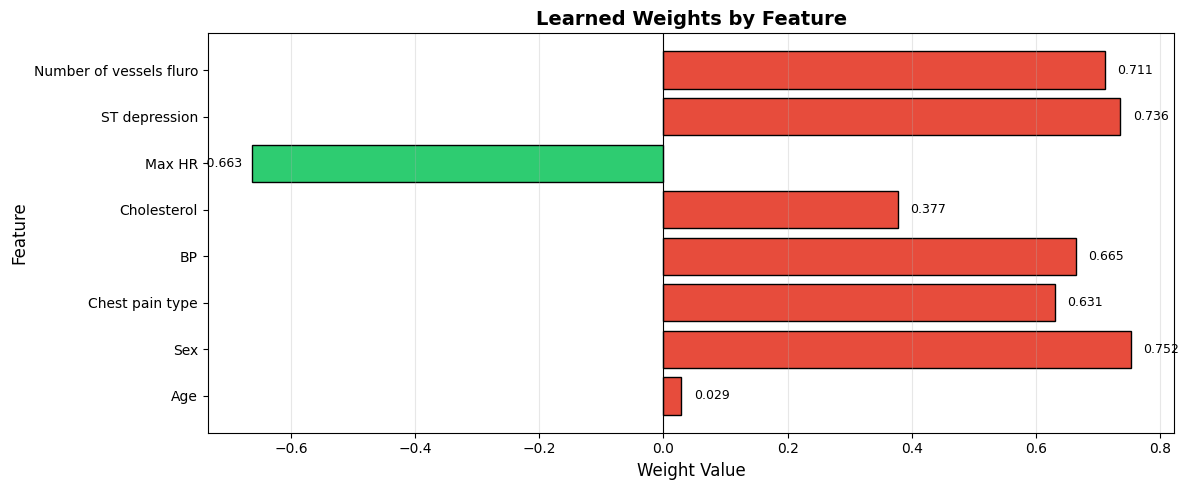


📊 Weight Interpretation:
  • Positive weights (red): Higher values increase disease probability
  • Negative weights (green): Higher values decrease disease probability


In [23]:
# Display trained parameters
print("=" * 70)
print("TRAINED MODEL PARAMETERS")
print("=" * 70)

print(f"\nBias (b): {b_trained:.6f}")
print(f"\nWeights (w):")
print("-" * 60)
print(f"{'Feature':<30} {'Weight':>12} {'Interpretation':<20}")
print("-" * 60)

for i, feature in enumerate(selected_features):
    weight = w_trained[i]
    # Interpretation based on sign and magnitude
    if weight > 0.1:
        interpretation = "↑ Increases risk"
    elif weight < -0.1:
        interpretation = "↓ Decreases risk"
    else:
        interpretation = "~ Minimal impact"
    print(f"{feature:<30} {weight:>12.6f} {interpretation:<20}")

print("-" * 60)
print(f"\n||w|| (L2 norm): {np.linalg.norm(w_trained):.6f}")

# Visualize weights
plt.figure(figsize=(12, 5))
colors = ['#e74c3c' if w > 0 else '#2ecc71' for w in w_trained]
bars = plt.barh(selected_features, w_trained, color=colors, edgecolor='black')
plt.xlabel('Weight Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Learned Weights by Feature', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(True, axis='x', alpha=0.3)

# Add value labels
for bar, val in zip(bars, w_trained):
    x_pos = val + 0.02 if val >= 0 else val - 0.08
    plt.text(x_pos, bar.get_y() + bar.get_height()/2, f'{val:.3f}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📊 Weight Interpretation:")
print("  • Positive weights (red): Higher values increase disease probability")
print("  • Negative weights (green): Higher values decrease disease probability")

### 2.8 Prediction Function

Implement the prediction function using threshold = 0.5.

In [24]:
def predict(w, b, X, threshold=0.5):
    """
    Make predictions using the trained logistic regression model.
    
    Parameters:
    -----------
    w : numpy array (n,) - Trained weights
    b : float - Trained bias
    X : numpy array (m, n) - Feature matrix
    threshold : float - Decision threshold (default: 0.5)
    
    Returns:
    --------
    y_pred : numpy array (m,) - Predicted labels (0 or 1)
    y_prob : numpy array (m,) - Predicted probabilities
    """
    # Compute probabilities
    z = X @ w + b
    y_prob = sigmoid(z)
    
    # Apply threshold
    y_pred = (y_prob >= threshold).astype(int)
    
    return y_pred, y_prob

# Make predictions on training and test sets
y_train_pred, y_train_prob = predict(w_trained, b_trained, X_train_norm)
y_test_pred, y_test_prob = predict(w_trained, b_trained, X_test_norm)

print("Predictions generated successfully!")
print(f"Training set predictions: {y_train_pred.shape[0]} samples")
print(f"Test set predictions: {y_test_pred.shape[0]} samples")

Predictions generated successfully!
Training set predictions: 189 samples
Test set predictions: 81 samples


### 2.9 Evaluation Metrics

Evaluate the model using:
- **Accuracy**: Overall correct predictions
- **Precision**: Correct positive predictions / Total positive predictions  
- **Recall**: Correct positive predictions / Actual positives (Sensitivity)
- **F1-Score**: Harmonic mean of Precision and Recall

In [25]:
def compute_metrics(y_true, y_pred):
    """
    Compute classification metrics from scratch.
    
    Parameters:
    -----------
    y_true : numpy array - True labels
    y_pred : numpy array - Predicted labels
    
    Returns:
    --------
    metrics : dict - Dictionary containing accuracy, precision, recall, f1
    confusion : dict - Confusion matrix components (TP, TN, FP, FN)
    """
    # Confusion matrix components
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives
    
    # Compute metrics
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    metrics = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }
    
    confusion = {
        'TP': TP,
        'TN': TN,
        'FP': FP,
        'FN': FN
    }
    
    return metrics, confusion

# Compute metrics for training set
train_metrics, train_confusion = compute_metrics(y_train, y_train_pred)

# Compute metrics for test set
test_metrics, test_confusion = compute_metrics(y_test, y_test_pred)

print("✅ Metrics computed successfully!")

✅ Metrics computed successfully!


### 2.10 Confusion Matrix Visualization

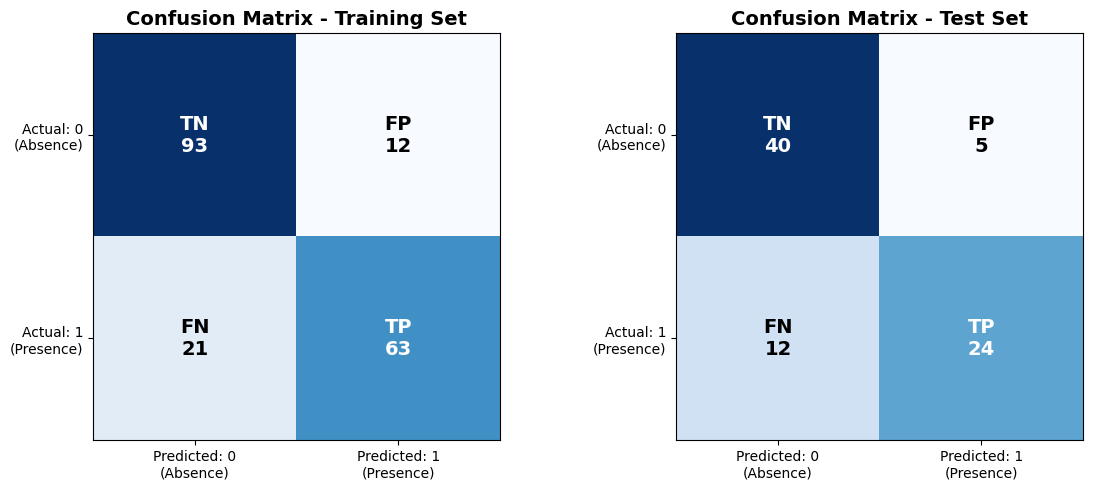


📊 CONFUSION MATRIX DETAILS

Training Set:
  True Negatives (TN):   93 (correctly identified as Absence)
  False Positives (FP):  12 (incorrectly identified as Presence)
  False Negatives (FN):  21 (missed Presence cases)
  True Positives (TP):   63 (correctly identified as Presence)

Test Set:
  True Negatives (TN):   40 (correctly identified as Absence)
  False Positives (FP):   5 (incorrectly identified as Presence)
  False Negatives (FN):  12 (missed Presence cases)
  True Positives (TP):   24 (correctly identified as Presence)


In [26]:
def plot_confusion_matrix(confusion, title, ax):
    """Plot a confusion matrix on the given axes."""
    cm = np.array([[confusion['TN'], confusion['FP']], 
                   [confusion['FN'], confusion['TP']]])
    
    im = ax.imshow(cm, cmap='Blues')
    
    # Add labels
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(['Predicted: 0\n(Absence)', 'Predicted: 1\n(Presence)'])
    ax.set_yticklabels(['Actual: 0\n(Absence)', 'Actual: 1\n(Presence)'])
    
    # Add values
    labels = [['TN', 'FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            text_color = 'white' if cm[i, j] > cm.max()/2 else 'black'
            ax.text(j, i, f"{labels[i][j]}\n{cm[i, j]}", 
                   ha='center', va='center', fontsize=14, color=text_color, fontweight='bold')
    
    ax.set_title(title, fontsize=14, fontweight='bold')
    return im

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_confusion_matrix(train_confusion, 'Confusion Matrix - Training Set', axes[0])
plot_confusion_matrix(test_confusion, 'Confusion Matrix - Test Set', axes[1])

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("\n📊 CONFUSION MATRIX DETAILS")
print("=" * 60)
print("\nTraining Set:")
print(f"  True Negatives (TN):  {train_confusion['TN']:3d} (correctly identified as Absence)")
print(f"  False Positives (FP): {train_confusion['FP']:3d} (incorrectly identified as Presence)")
print(f"  False Negatives (FN): {train_confusion['FN']:3d} (missed Presence cases)")
print(f"  True Positives (TP):  {train_confusion['TP']:3d} (correctly identified as Presence)")

print("\nTest Set:")
print(f"  True Negatives (TN):  {test_confusion['TN']:3d} (correctly identified as Absence)")
print(f"  False Positives (FP): {test_confusion['FP']:3d} (incorrectly identified as Presence)")
print(f"  False Negatives (FN): {test_confusion['FN']:3d} (missed Presence cases)")
print(f"  True Positives (TP):  {test_confusion['TP']:3d} (correctly identified as Presence)")

### 2.11 Metrics Summary Table

📋 STEP 2 COMPLETE: MODEL EVALUATION METRICS

------------------------------------------------------------
Metric                Training Set           Test Set
------------------------------------------------------------
Accuracy                    82.54%             79.01%
Precision                   84.00%             82.76%
Recall                      75.00%             66.67%
F1-Score                    79.25%             73.85%
------------------------------------------------------------


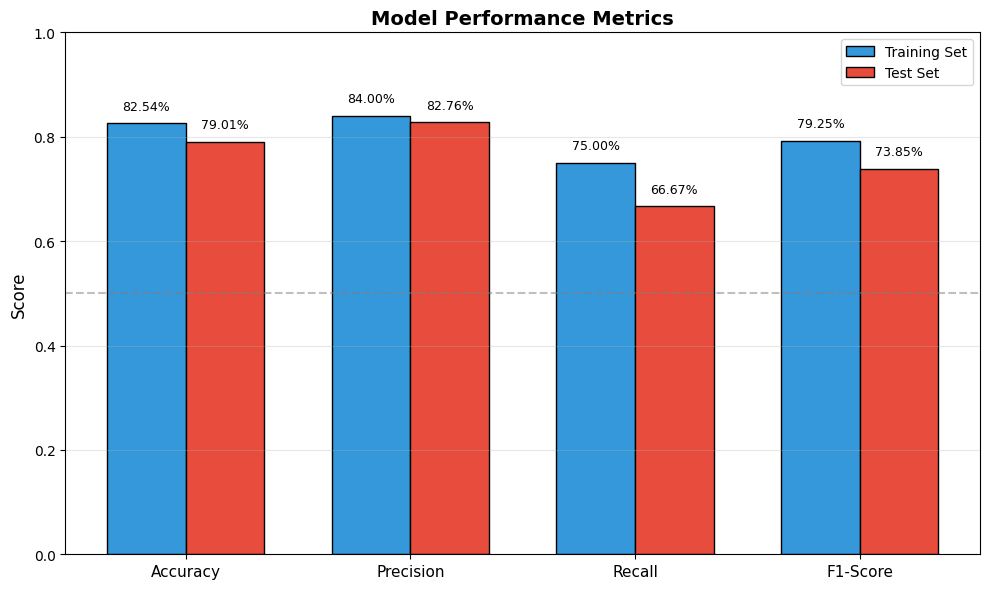


📊 MODEL INTERPRETATION:
✅ No significant overfitting: Train-Test accuracy gap = 3.53%

📈 Top 3 Most Influential Features (by |weight|):
   1. Sex: increases heart disease risk (w = 0.7523)
   2. ST depression: increases heart disease risk (w = 0.7357)
   3. Number of vessels fluro: increases heart disease risk (w = 0.7106)


In [27]:
# Create metrics summary table
print("=" * 70)
print("📋 STEP 2 COMPLETE: MODEL EVALUATION METRICS")
print("=" * 70)

# Metrics table
print("\n" + "-" * 60)
print(f"{'Metric':<15} {'Training Set':>18} {'Test Set':>18}")
print("-" * 60)
print(f"{'Accuracy':<15} {train_metrics['accuracy']*100:>17.2f}% {test_metrics['accuracy']*100:>17.2f}%")
print(f"{'Precision':<15} {train_metrics['precision']*100:>17.2f}% {test_metrics['precision']*100:>17.2f}%")
print(f"{'Recall':<15} {train_metrics['recall']*100:>17.2f}% {test_metrics['recall']*100:>17.2f}%")
print(f"{'F1-Score':<15} {train_metrics['f1']*100:>17.2f}% {test_metrics['f1']*100:>17.2f}%")
print("-" * 60)

# Visualize metrics comparison
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
train_values = [train_metrics['accuracy'], train_metrics['precision'], 
                train_metrics['recall'], train_metrics['f1']]
test_values = [test_metrics['accuracy'], test_metrics['precision'], 
               test_metrics['recall'], test_metrics['f1']]

x = np.arange(len(metrics_names))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, train_values, width, label='Training Set', color='#3498db', edgecolor='black')
bars2 = ax.bar(x + width/2, test_values, width, label='Test Set', color='#e74c3c', edgecolor='black')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Model Performance Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics_names, fontsize=11)
ax.legend(fontsize=10)
ax.set_ylim(0, 1.0)
ax.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5, label='Random baseline')
ax.grid(True, axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2%}', ha='center', va='bottom', fontsize=9)
for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.2%}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Model interpretation
print("\n📊 MODEL INTERPRETATION:")
print("=" * 60)

# Check for overfitting
acc_diff = train_metrics['accuracy'] - test_metrics['accuracy']
if acc_diff > 0.1:
    print(f"⚠️  Possible overfitting detected: Train-Test accuracy gap = {acc_diff*100:.2f}%")
else:
    print(f"✅ No significant overfitting: Train-Test accuracy gap = {acc_diff*100:.2f}%")

# Analyze key weights
print("\n📈 Top 3 Most Influential Features (by |weight|):")
weight_importance = sorted(zip(selected_features, np.abs(w_trained)), key=lambda x: x[1], reverse=True)
for i, (feat, importance) in enumerate(weight_importance[:3], 1):
    idx = selected_features.index(feat)
    direction = "increases" if w_trained[idx] > 0 else "decreases"
    print(f"   {i}. {feat}: {direction} heart disease risk (w = {w_trained[idx]:.4f})")